<a href="https://colab.research.google.com/github/BriouaNorElHouda/py/blob/main/plantsv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import CategoricalCrossentropy
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pickle
import time

In [5]:
data  =[]
src_path='/content/drive/MyDrive/Colab Notebooks/plants'

subclass=os.listdir(src_path)
def create_data():
     for sclass in subclass:
         path=os.path.join(src_path,sclass)
         class_num=subclass.index(sclass)
         for img in tqdm(os.listdir(path)):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array=cv2.resize(img_array, (224,224))
            data.append([new_array,class_num])

create_data()


print("Total samples in the dataset:", len(data))


100%|██████████| 75/75 [00:02<00:00, 32.18it/s]

Total samples in the dataset: 1125


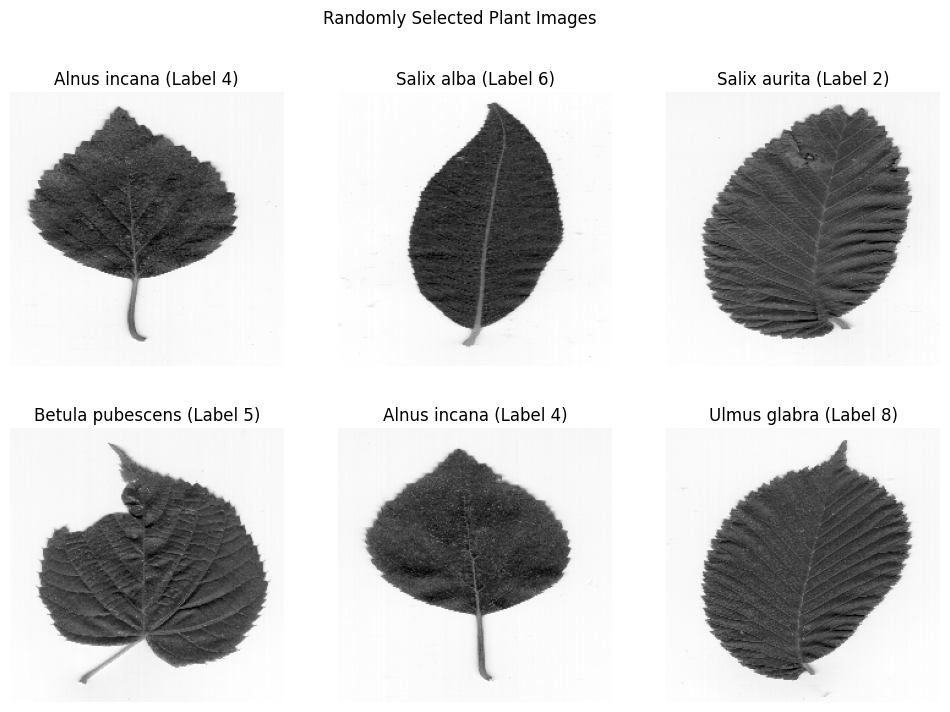

In [6]:
import random
main_directory = '/content/drive/MyDrive/Colab Notebooks/plants'
types = {
    'Ulmus carpinifolia': 0,
    'Acer': 1,
    'Salix aurita': 2,
    'Quercus': 3,
    'Alnus incana': 4,
    'Betula pubescens': 5,
    'Salix alba': 6,
    'Populus tremula': 7,
    'Ulmus glabra': 8,
    'Sorbus aucuparia': 9,
    'Salix sinerea': 10,
    'Populus': 11,
    'Tilia': 12,
    'Sorbus intermedia': 13,
    'Fagus silvatica': 14,
}


image_files = []
for root, dirs, files in os.walk(main_directory):
    for file in files:
        if file.endswith(".tif"):
            image_files.append((os.path.join(root, file), os.path.basename(root)))

random_images = random.sample(image_files, 6)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Randomly Selected Plant Images')

for i, (image_file, plant_name) in enumerate(random_images):
    img_array = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (224, 224))

    row_index = i // 3
    col_index = i % 3

    label_number = types[plant_name]
    axes[row_index, col_index].imshow(new_array, cmap='gray')
    axes[row_index, col_index].set_title(f'{plant_name} (Label {label_number})')
    axes[row_index, col_index].axis('off')

plt.show()



In [7]:
X=[]
y=[]

for features,label in data:
    X.append(features)
    y.append(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.array(X_train).reshape(-1, 224, 224, 1)
X_test = np.array(X_test).reshape(-1, 224, 224, 1)
y_train = np.array(y_train)
y_test = np.array(y_test)


X_train = X_train / 255.0

#y_train = to_categorical(y_train, num_classes=15)
#print(X_train[0])

In [13]:

NAME="Model"

model=Sequential()

model.add(Conv2D(32,(5,5),padding="same",strides=(2,2),activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/10
720/720 [==============================] - 7s 9ms/step - loss: 1.5769 - accuracy: 0.5500 - val_loss: 0.7683 - val_accuracy: 0.7778
Epoch 2/10
720/720 [==============================] - 7s 9ms/step - loss: 0.4327 - accuracy: 0.8736 - val_loss: 0.6010 - val_accuracy: 0.8500
Epoch 3/10
720/720 [==============================] - 6s 8ms/step - loss: 0.2044 - accuracy: 0.9486 - val_loss: 0.4790 - val_accuracy: 0.8778
Epoch 4/10
720/720 [==============================] - 7s 9ms/step - loss: 0.0841 - accuracy: 0.9889 - val_loss: 0.5222 - val_accuracy: 0.8667
Epoch 5/10
720/720 [==============================] - 6s 8ms/step - loss: 0.0523 - accuracy: 0.9889 - val_loss: 0.5043 - val_accuracy: 0.8611
Epoch 6/10
720/720 [==============================] - 7s 9ms/step - loss: 0.0279 - accuracy: 0.9986 - val_loss: 0.4849 - val_accuracy: 0.8778
Epoch 7/10
720/720 [==============================] - 6s 8ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.5144 - val_accuracy: 0.8722
Epoch 

In [17]:
NAME="Model2"

model=Sequential()

model.add(Conv2D(64,(5,5),padding="same",strides=(2,2),activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(5,5),padding="same",strides=(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/10
720/720 [==============================] - 9s 12ms/step - loss: 2.7043 - accuracy: 0.0861 - val_loss: 2.4864 - val_accuracy: 0.1333
Epoch 2/10
720/720 [==============================] - 9s 12ms/step - loss: 1.7206 - accuracy: 0.4194 - val_loss: 1.0418 - val_accuracy: 0.5944
Epoch 3/10
720/720 [==============================] - 7s 10ms/step - loss: 0.8732 - accuracy: 0.6736 - val_loss: 0.6624 - val_accuracy: 0.7556
Epoch 4/10
720/720 [==============================] - 8s 12ms/step - loss: 0.6469 - accuracy: 0.7514 - val_loss: 0.5712 - val_accuracy: 0.7889
Epoch 5/10
720/720 [==============================] - 8s 12ms/step - loss: 0.4839 - accuracy: 0.8181 - val_loss: 0.5186 - val_accuracy: 0.8000
Epoch 6/10
720/720 [==============================] - 8s 11ms/step - loss: 0.3787 - accuracy: 0.8736 - val_loss: 0.4462 - val_accuracy: 0.8111
Epoch 7/10
720/720 [==============================] - 8s 12ms/step - loss: 0.3279 - accuracy: 0.8875 - val_loss: 0.3803 - val_accuracy: 0.8444

In [ ]:
NAME="Model3"

model=Sequential()

model.add(Conv2D(64,(5,5),padding="same",strides=(2,2),activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(5,5),strides=(5,5)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(5,5),padding="same",strides=(2,2),activation="relu"))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])

In [100]:
NAME="Model4"

model=Sequential()

model.add(Conv2D(32,(5,5),padding="same",strides=(4,4),activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))

model.add(Flatten())
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard= TensorBoard(log_dir="logs\\{}".format(NAME))
X=np.array(X)
y=np.array(y)

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=10,batch_size=1,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/10
720/720 [==============================] - 5s 6ms/step - loss: 1.9885 - accuracy: 0.3792 - val_loss: 1.1696 - val_accuracy: 0.6444
Epoch 2/10
720/720 [==============================] - 3s 4ms/step - loss: 0.7849 - accuracy: 0.7764 - val_loss: 0.6382 - val_accuracy: 0.7778
Epoch 3/10
720/720 [==============================] - 3s 5ms/step - loss: 0.4989 - accuracy: 0.8431 - val_loss: 0.5291 - val_accuracy: 0.8444
Epoch 4/10
720/720 [==============================] - 4s 6ms/step - loss: 0.3498 - accuracy: 0.8958 - val_loss: 0.4121 - val_accuracy: 0.8833
Epoch 5/10
720/720 [==============================] - 4s 6ms/step - loss: 0.2750 - accuracy: 0.9125 - val_loss: 0.4397 - val_accuracy: 0.8444
Epoch 6/10
720/720 [==============================] - 3s 5ms/step - loss: 0.1946 - accuracy: 0.9472 - val_loss: 0.3995 - val_accuracy: 0.8778
Epoch 7/10
720/720 [==============================] - 4s 6ms/step - loss: 0.1487 - accuracy: 0.9625 - val_loss: 0.3705 - val_accuracy: 0.9000
Epoch 

In [49]:
num_classes = len(set(y))
print("Number of classes:", num_classes)

Number of classes: 15


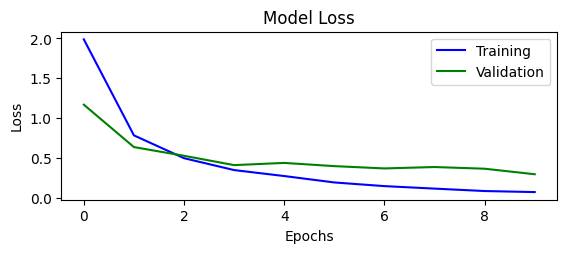

In [101]:
#Plot Model Loss
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='upper right')

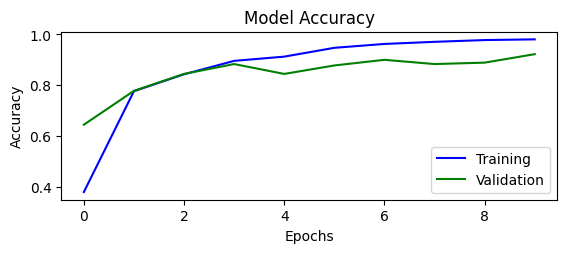

In [102]:
# Plot Accuracy
plt.subplot(211)
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training','Validation'],loc='lower right')

In [79]:
model.save("plants.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [103]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 56, 56, 32)        832       
                                                                 
 max_pooling2d_119 (MaxPool  (None, 26, 26, 32)        0         
 ing2D)                                                          
                                                                 
 max_pooling2d_120 (MaxPool  (None, 11, 11, 32)        0         
 ing2D)                                                          
                                                                 
 flatten_55 (Flatten)        (None, 3872)              0         
                                                                 
 dense_57 (Dense)            (None, 15)                58095     
                                                                 
 activation_55 (Activation)  (None, 15)              